In [3]:
import numpy as np
from matplotlib import pyplot as plt
from utils_np import *

In [4]:

def hat(x):
    A = np.zeros((3,3))
    A[0,1:] = [-x[2],x[1]]
    A[1,::2] = [x[2],-x[0]]
    A[2,:2] = [-x[1],x[0]]
    return A

def hat_inv(S):
    x = np.zeros(S.shape[0])
    x[0] = S[2,1]
    x[1] = S[0,2]
    x[2] = S[1,0]
    return x


def check_orth(A):
    return np.linalg.norm(np.eye(A.shape[0]) - A@A.T,ord="fro")

def get_orth(n,seed = 1):
    np.random.seed(seed)
    Q,R = np.linalg.qr(np.random.rand(n,n))
    return Q

def cay(A):
    I = np.eye(A.shape[0])
    return np.linalg.inv(I - .5*A)@(I + .5*A)

def rodrigues(A):
    alpha = (1/np.sqrt(2))*np.linalg.norm(A,ord="fro")
    return np.eye(A.shape[0]) + (np.sin(alpha)/alpha)*A + ((1-np.cos(alpha))/alpha**2)*A@A

def get_sphere():

    u = np.linspace(0, 2*np.pi,200)
    v = np.linspace(0, np.pi, 200)
    x = np.outer(np.cos(u), np.sin(v)) 
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, z, color='g',alpha=0.2,cmap=plt.cm.YlGnBu_r)

    return ax



def get_sphere_energy(energy,l):

    u = np.linspace(0, 2*np.pi,200)
    v = np.linspace(0, np.pi, 200)
    x = np.outer(np.cos(u), np.sin(v)) 
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    WW = x.copy()
    for i in range( len( x ) ):
        for j in range( len( x ) ):
            xx = x[ i, j ]
            yy = y[ i, j ]
            zz = z[ i, j ]
            WW[ i, j ] = energy(np.array( [xx, yy, zz ] ),l)
    WW = WW / np.amax( WW )
    myheatmap = WW

    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, z, color='g',alpha=0.2,cmap=plt.cm.YlGnBu_r,facecolors=cm.jet( myheatmap ))

    return ax




def frob_log(A):
    alpha = (1/np.sqrt(2))*np.linalg.norm(A,ord="fro")
    if alpha < 1e-14:
        return 0
    elif np.abs(alpha) < np.pi:
        return np.abs((alpha/(2*np.sin(alpha))))*np.linalg.norm((A-A.T),ord="fro")
    else:
        return np.sqrt(2)*np.abs(alpha)

def dist_so3(R1,R2):
    return (1/np.sqrt(2))*frob_log(R1.T@R2)

def dist_trajectory(Rs):
    dist = 0
    for R1,R2 in zip(Rs[0:-1],Rs[1:]):
        dist += dist_so3(R1,R2)
    return dist


    

# Rotation in the inertial frame

Let $\omega \in \R^3$ be the angular velocity and let $R \in SO(3)$ be the orientation of a body $R$ seen from the inertial frame. Then

$$
\dot R = RS(\omega)
$$

where 

$$
S(\omega) = \begin{bmatrix}
0 &  \omega_3 & -\omega_2\\
-\omega_3 & 0 & \omega_1\\
\omega_2 & - \omega_1 & 0
\end{bmatrix}
$$ 

and 

$$
SO(3) := \{R \in \R^{3 \times 3} \; | \; RR^T = I, \; \text{det}(R) = 1 \}.
$$


# Dynamics

Newtons second law ($\dot L = u$), that the time derivative of angular momentum is equal to external forces, gives us

$$
S(\omega)\mathcal I \omega + \mathcal I \dot \omega = u
$$

# Hamiltonian system

Since the kinetic energy is given by $T = \omega^T\mathcal I \omega$, we get the Lagrangian on the form

$$
\mathcal L = T + U =\frac{1}{2} \omega^T\mathcal I \omega 
$$

The Legendre transformation allows us to find the Hamiltonian (in the "classical" notation $\dot q = \omega$).

$$
\begin{align}
p &= \frac{d \mathcal L}{d\omega} = \mathcal I \omega\\
\implies \omega &= \mathcal I^{-1}p\\ \\
H(q,p) &= p^T\dot q - \mathcal L(q,\dot q) \\
&= p^T \omega - \frac{1}{2} \omega^T\mathcal I \omega  \\
&= p^T\mathcal I^{-1}p - \frac{1}{2}p^T\mathcal I^{-T}\mathcal I \mathcal I^{-1}p\\
&= \frac{1}{2}p^T\mathcal I^{-1}p 
\end{align}
$$

We can now write the Kinetics equation by

$$
\dot p = S(p)\nabla_p H(p) + u
$$

Consider now the kinematic equation. Let $r_i$ be row $i$ of $R$. Then $\dot R = RS(\omega)$ is equivalent to

$$
r_i = r_i \times \omega = S(r_i)\omega.
$$

Defining $q = [r_1^T,r_2^T,r_3^T]^T \in \R^9$ and $S(q) := [S(r_1),S(r_2),S(r_3)]^T \in \R^{9 \times 3}$, we can rewrite the kinematics as 

$$
\dot q = S(q)\omega
$$

Since $\nabla_p H(p) = \mathcal I^{-1}\omega = \omega$ we can write the kinematics and kinetics as the port-Hamiltonian system

$$
\begin{bmatrix}
\dot q\\
\dot p
\end{bmatrix}
=
\begin{bmatrix}
0 & S(q)\\
-S(q) & S(p)
\end{bmatrix}
\begin{bmatrix}
\nabla_q H(q,p) \\
\nabla_p H(q,p)
\end{bmatrix}
+
\begin{bmatrix}
0 \\
I
\end{bmatrix}
u
$$


# Control by energy shaping (ES) and damping injection (DI)

This follows chapter 3 of Forni, Jeltsema & Lopes.

Energy balancing by setting

$$
H_d(q,p) = H(q,p) + H_{\text{ref}}(q,p)
$$

such that if we want to drive the system to ($q^*,p^*)$ we have 

$$
\text{argmin}_{q,p} H_{\text{d}}(q,p) = (q^*,p^*)
$$

This is achieved by setting, for $K_p = \text{diag}\{k_1,k_2,k_3\}$

$$
H_{\text{ref}}(q) := \frac{1}{2}\text{tr}[K_p(I - R_{\text{ref}}^TR)]
$$

**Why does this work? Need to verify this.**

Then we let
$$
\begin{align}
u_{\text{es}} := -S(q)^T \nabla_q H_{\text{ref}}(q) &= \frac{1}{2} \sum_{i=1}^3 S(r_i)^TK_p r_{\text{ref},i} \\
 &= -\frac{1}{2} \sum_{i=1}^3 S(r_i) K_p r_{\text{ref},i} \\
 &=  -\frac{1}{2} \sum_{i=1}^3 r_i \times K_p r_{\text{ref},i} \\
 &= -\frac{1}{2} \sum_{i=1}^3 [ K_p r_{\text{ref},i} r_i^T - r_ir_{\text{ref},i}^TK_p^T ]^{\vee} \\
 &= -\frac{1}{2} ( K_p R_{\text{ref}}^TR - R^TR_{\text{ref}}K_p^T )^{\vee} 
\end{align}
$$

Where $\cdot^{\vee}$ is the inverse of $S(\cdot)$, mapping a skew symmetric matrix to a vector.

We add damping by setting, for $K_d = \text{diag}\{k_1,k_2,k_3\}$

$$
u_{\text{di}} = -K_d y = -K_d \nabla_p H(q,p) = -K_d \omega
$$

This means we get

$$
\begin{align}
\begin{bmatrix}
\dot q\\
\dot p
\end{bmatrix}
&=
\begin{bmatrix}
0 & S(q)\\
-S(q)^T & S(p)
\end{bmatrix}
\begin{bmatrix}
\nabla_q H(q,p) \\
\nabla_p H(q,p)
\end{bmatrix}
+
\begin{bmatrix}
0 \\
I
\end{bmatrix}
(u_{\text{es}} + u_{\text{di}})\\
&= \begin{bmatrix}
0 & S(q)\\
-S(q)^T & S(p)
\end{bmatrix}
\begin{bmatrix}
\nabla_q H(q,p) \\
\nabla_p H(q,p)
\end{bmatrix}
+
\begin{bmatrix}
0 \\
I
\end{bmatrix}
\bigg(-S(q)^T \nabla_q H_{\text{ref}}(q) - K_d \nabla_p H(q,p)\bigg)\\
&= 
\begin{bmatrix}
0 & S(q)\\
-S(q)^T & S(p) - K_p
\end{bmatrix}
\begin{bmatrix}
\nabla_q (H(q,p) + H_{\text{ref}}(q,p)) \\
\nabla_p H(q,p)
\end{bmatrix}
\end{align}
$$

# Solving IVPs for a rigid body

We first set initial values and the moments of inertia.



In [5]:
#Initial values
R0 = get_orth(3)
w0 = np.array([-0.1,0.1,0.3])


#Step size and number of steps
dt = 0.01
N = 50_000

#Moments of inertia and inverse
diag_I = np.array([1,0.8,0.1])
I = np.diag(diag_I)
I_inv = np.diag(1/diag_I)

#Defining the time derivatives
w_dot = lambda w : I_inv@hat(I@w)@w 
R_dot = lambda w : hat(w)


Time stepping with explicit euler for $\omega$ and Lie euler using the Rodrigues formula for the orientation $R$.

In [6]:
Rs = [R0]
Rs_e = [R0]
ws = [w0]

for n in range(N):
    R0 = Rs[-1]
    w0 = ws[-1]
    
    #Lie Euler
    R1 = R0@rodrigues(dt*R_dot(w0))
    #Explicit Euler
    w1 = w0 + dt*w_dot(w0)

    Rs.append(R1)
    ws.append(w1)

Rs = np.stack(Rs)
ws = np.stack(ws)



Plotting row $i$, $r_i \in S^2$ of $R$ trough time.

Text(0.5, 0.92, '$r_2$')

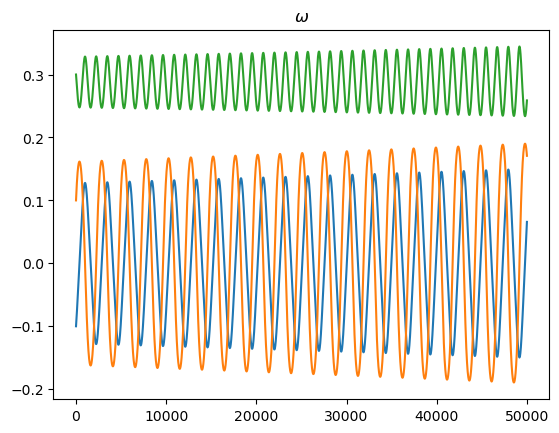

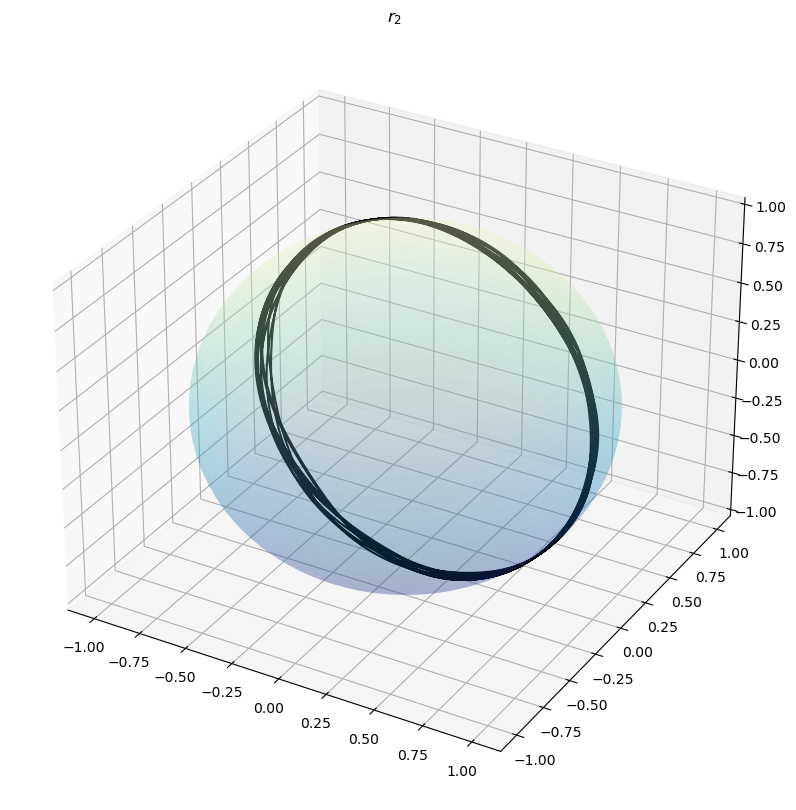

In [7]:
plt.plot(ws)
plt.title(r"$\omega$")

ax = get_sphere()

i = 2
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-')
plt.title(f"$r_{i}$")


# Applying ES & DI control for a rigid body

Setting initial values and the target orientation ```Rref``` as well as gains ```Kp,Kd``` for the control problem.

In [8]:
#Initial values
R0 = get_orth(3)
R00 = R0
w0 = np.array([-0.1,0.8,0.3])

#Step size and number of steps
dt = 0.01
N = 10_000


#Controller gains and desired orientation
Kp = np.diag([1]*3)
Kd = Kp*2
Rref = get_orth(3,seed=3)

#Moments of intertia and inverse 
diag_I = np.array([1,0.8,1])
I = np.diag(diag_I)
I_inv = np.diag(1/diag_I)

#Defining the energy shaping and damping injection controls
u_es = lambda R: -.5*hat_inv(Kp@Rref.T@R - R.T@Rref@Kp.T)
u_di = lambda w: -Kd@w

#Time derivatives with controls
w_dot_es_di = lambda w,R : I_inv@(hat(I@w)@w + u_es(R) + u_di(w) )
R_dot = lambda w : hat(w) 

#Rotational energy and injected control energy (for plotting)
hamiltonian_rot = lambda w : 0.5*w.T@I_inv@w
hamiltonian_ref = lambda R : .5*np.trace(Kp@(np.eye(3) - Rref.T@R))


In [9]:
Rs = [R0]
ws = [w0]
wpos= [w0] 

for n in range(N):
    R0 = Rs[-1]
    w0 = ws[-1]

    #Lie Euler
    Rs.append(R0@rodrigues(dt*R_dot(w0)))
    #Explicit Euler
    ws.append(w0 + dt*w_dot_es_di(w0,R0))

Rs = np.stack(Rs)
ws = np.stack(ws)


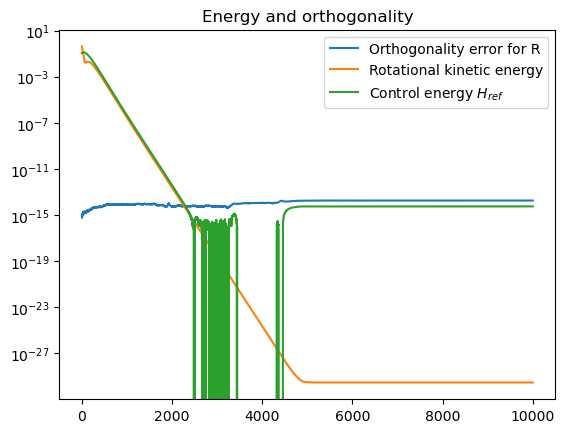

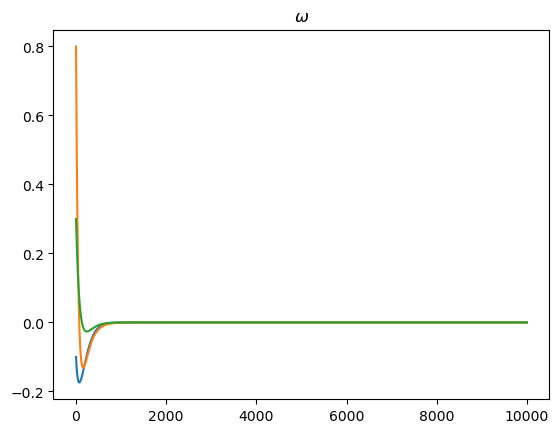

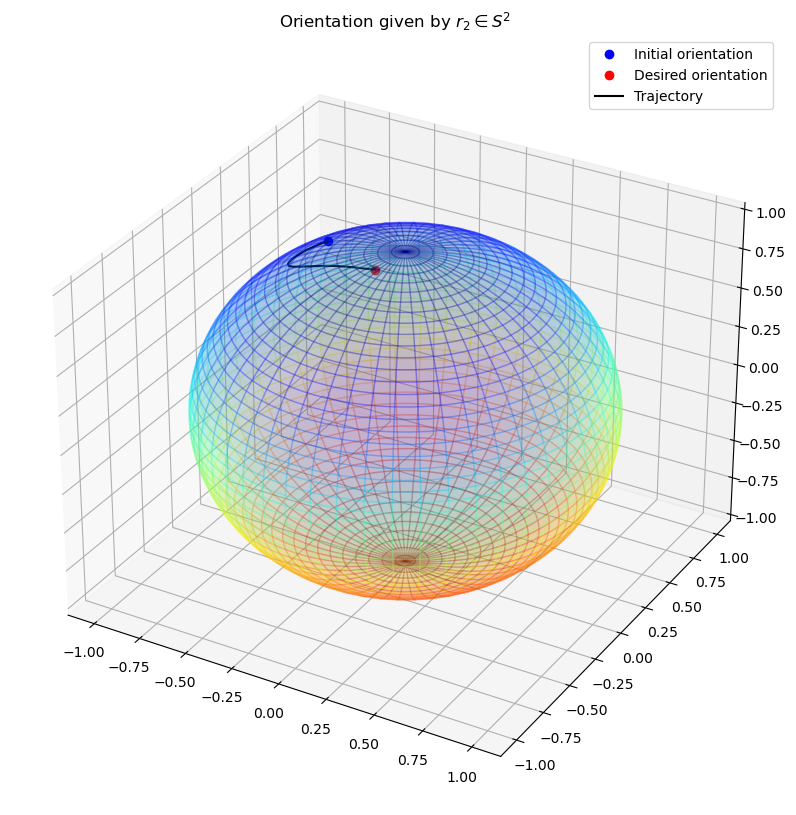

In [10]:
plt.semilogy([check_orth(R) for R in Rs],label="Orthogonality error for R")
plt.semilogy([hamiltonian_rot(w) for w in ws],label="Rotational kinetic energy")
plt.semilogy([hamiltonian_ref(R) for R in Rs],label="Control energy $H_{ref}$")
plt.legend()
plt.title("Energy and orthogonality")
plt.show()


plt.plot(ws)
plt.title(r"$\omega$")
plt.show()

energy = lambda R,i : .5*(Kp[i,i]*(1 - Rref[:,i].T@R))


i = 2
ax = get_sphere_energy(energy,i)
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()


# Applying extended controller with only orientation 


In [11]:
R0 = get_orth(3,seed=2)
R00 = R0
dt = 0.01
N = 10_000
Rref = get_orth(3,seed=3)

w0 = np.array([-0.1,0.8,0.3])

Kp = np.diag([1]*3)
Kd = Kp*2
Kc = Kp*20

diag_I = np.array([1,0.8,1])
I = np.diag(diag_I)
I_inv = np.diag(1/diag_I)

In [12]:
Rs = [R0]
Rcs = [np.eye(3)]
ws = [w0]
wpos= [w0] 

u_es = lambda R: -.5*hat_inv(Kp@Rref.T@R - R.T@Rref@Kp.T)

u_pos = lambda R,Rc : -.5*hat_inv(Kc@Rc.T@R - R.T@Rc@Kc.T) + u_es(R)
Rc_dot = lambda R,Rc : -.5*hat(Kd@(hat_inv(Kc@R.T@Rc - Rc.T@R@Kc.T)))


w_dot_pos = lambda w,R,Rc : I_inv@(hat(I@w)@w + u_pos(R,Rc) )
R_dot = lambda w : hat(w) 


for n in range(N):
    R0 = Rs[-1]
    w0 = ws[-1]
    Rc0 = Rcs[-1]

    Rs.append(R0@rodrigues(dt*R_dot(ws[-1])))
    Rcs.append(Rc0@rodrigues(dt*Rc_dot(R0,Rc0)))
    ws.append(w0 + dt*w_dot_pos(w0,R0,Rc0))
    


Rs = np.stack(Rs)
Rcs = np.stack(Rcs)
ws = np.stack(ws)


hamiltonian_ref = lambda R : .5*np.trace(Kp@(np.eye(3) - Rref.T@R))
hamiltonian_ref_c = lambda Rc,R : .5*np.trace(Kc@(np.eye(3) - Rc.T@R))
hamiltonian_rot = lambda w : 0.5*w.T@I_inv@w


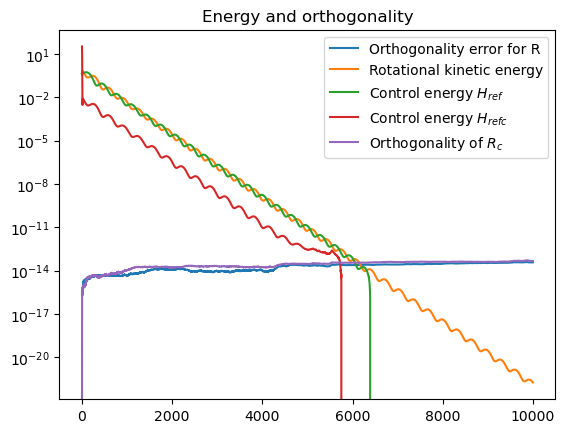

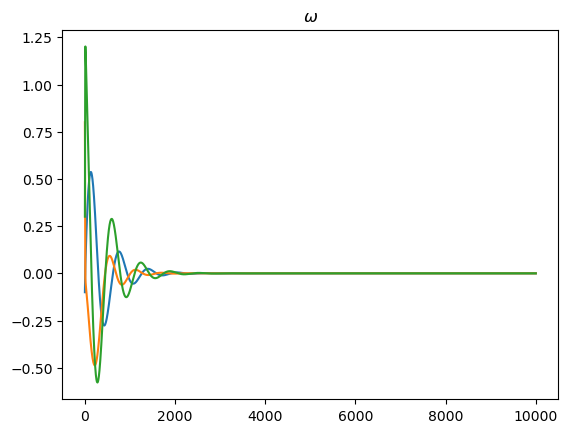

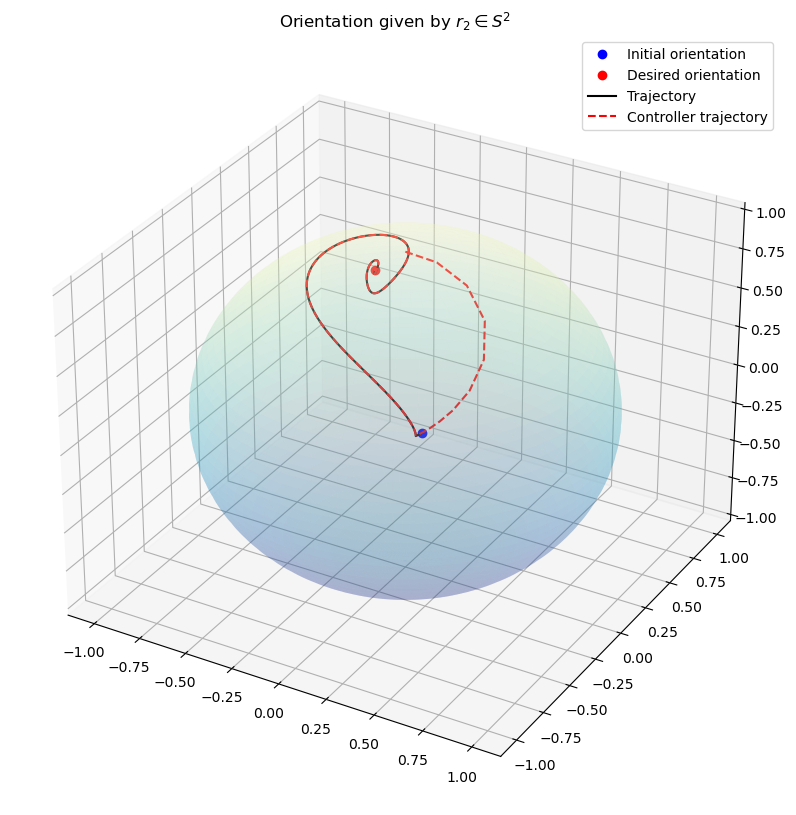

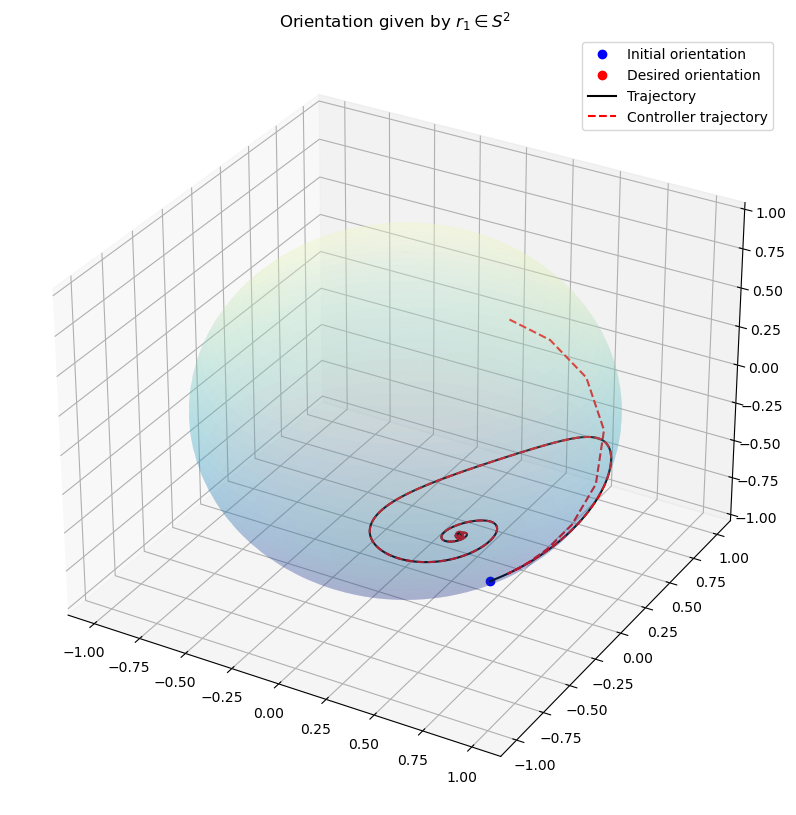

In [13]:
plt.semilogy([check_orth(R) for R in Rs],label="Orthogonality error for R")
plt.semilogy([hamiltonian_rot(w) for w in ws],label="Rotational kinetic energy")
plt.semilogy([hamiltonian_ref(R) for R in Rs],label="Control energy $H_{ref}$")
plt.semilogy([hamiltonian_ref_c(Rc,R) for Rc,R in zip(Rcs,Rs)],label="Control energy $H_{refc}$")
plt.semilogy([check_orth(R) for R in Rcs],label = "Orthogonality of $R_c$")
plt.legend()
plt.title("Energy and orthogonality")
plt.show()


plt.plot(ws)
plt.title(r"$\omega$")
plt.show()

ax = get_sphere()

i = 2
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()

ax = get_sphere()
i = 1
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()


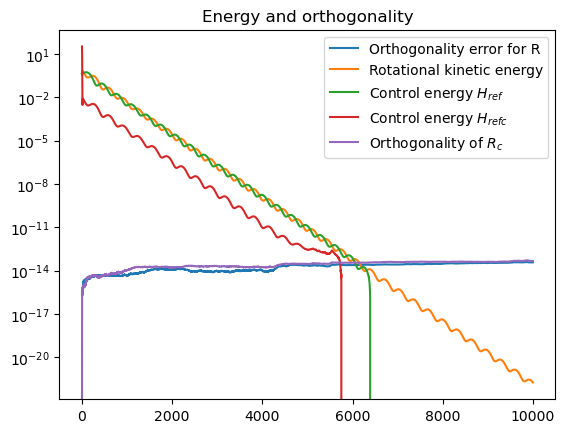

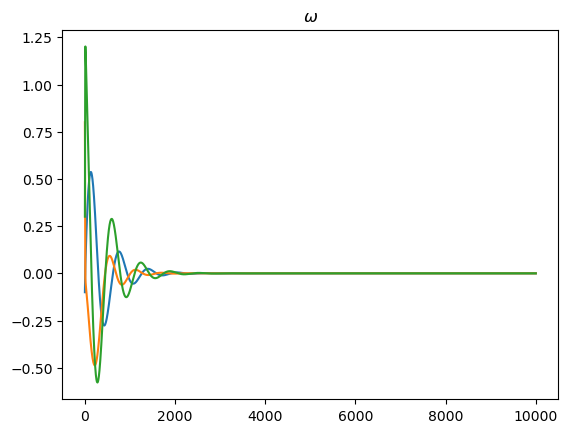

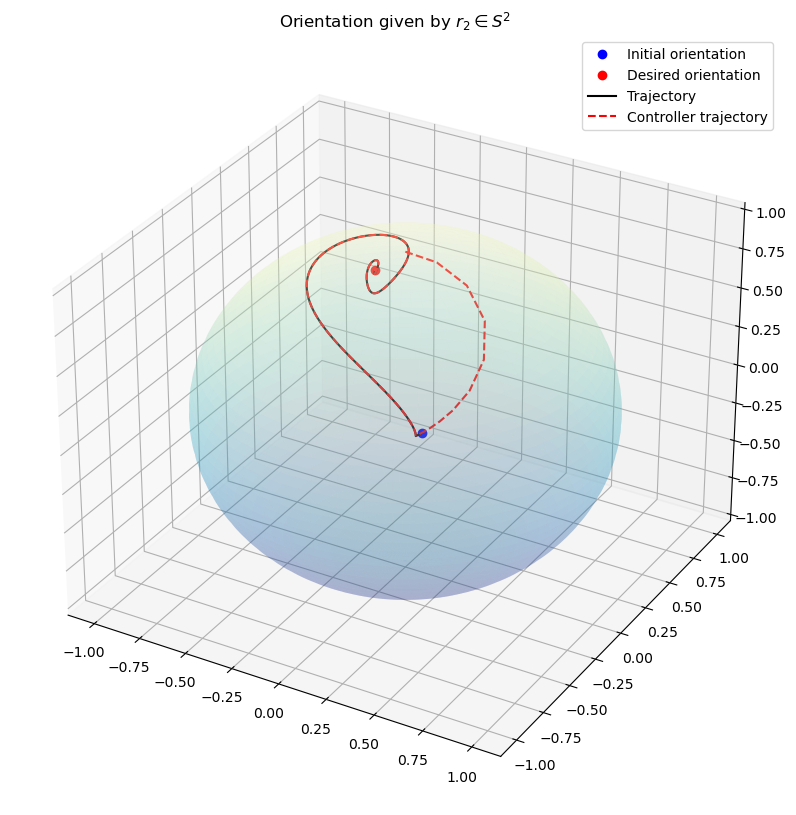

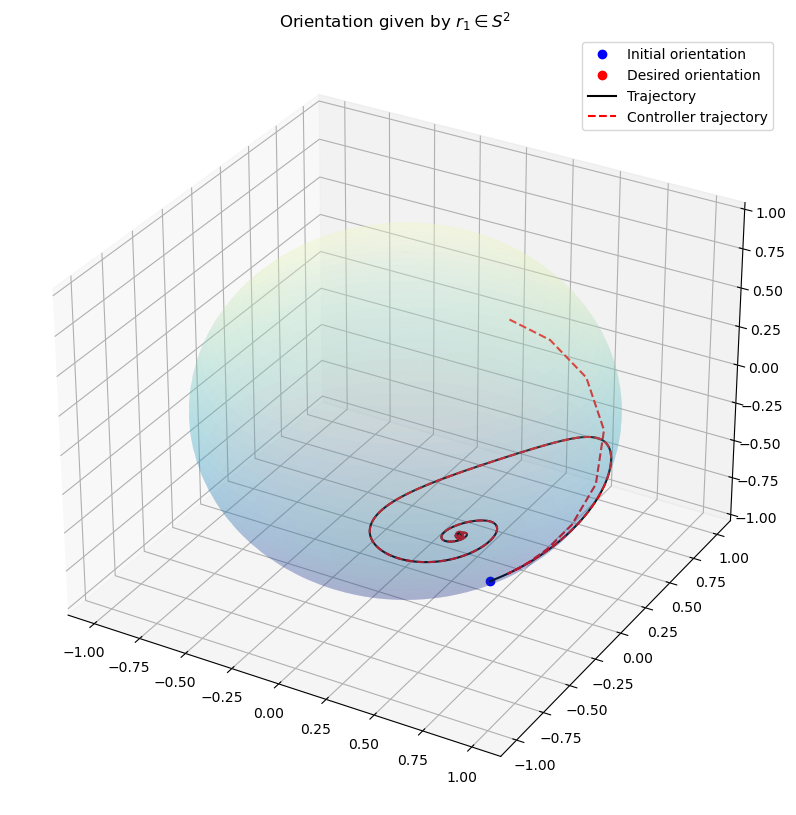

In [14]:
plt.semilogy([check_orth(R) for R in Rs],label="Orthogonality error for R")
plt.semilogy([hamiltonian_rot(w) for w in ws],label="Rotational kinetic energy")
plt.semilogy([hamiltonian_ref(R) for R in Rs],label="Control energy $H_{ref}$")
plt.semilogy([hamiltonian_ref_c(Rc,R) for Rc,R in zip(Rcs,Rs)],label="Control energy $H_{refc}$")
plt.semilogy([check_orth(R) for R in Rcs],label = "Orthogonality of $R_c$")
plt.legend()
plt.title("Energy and orthogonality")
plt.show()


plt.plot(ws)
plt.title(r"$\omega$")
plt.show()

ax = get_sphere()

i = 2
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()

ax = get_sphere()
i = 1
ax.plot3D(R00[0,i],R00[1,i],R00[2,i],'o',c="blue",label="Initial orientation")
ax.plot3D(Rref[0,i],Rref[1,i],Rref[2,i],'o',c="red",label="Desired orientation")
ax.plot3D(Rs[:,0,i],Rs[:,1,i],Rs[:,2,i],'k-',label="Trajectory")
ax.plot3D(Rcs[:,0,i],Rcs[:,1,i],Rcs[:,2,i],'r--',label="Controller trajectory")
plt.legend()
plt.title(f"Orientation given by $r_{i} \in S^2$")
plt.show()
